In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
help(patheffects.withSimplePatchShadow)

Help on class withSimplePatchShadow in module matplotlib.patheffects:

class withSimplePatchShadow(SimplePatchShadow)
 |  Adds a simple :class:`SimplePatchShadow` and then draws the
 |  original Artist to avoid needing to call :class:`Normal`.
 |  
 |  Method resolution order:
 |      withSimplePatchShadow
 |      SimplePatchShadow
 |      AbstractPathEffect
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  draw_path(self, renderer, gc, tpath, affine, rgbFace)
 |      Overrides the standard draw_path to add the shadow offset and
 |      necessary color changes for the shadow.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from SimplePatchShadow:
 |  
 |  __init__(self, offset=(2, -2), shadow_rgbFace=None, alpha=None, rho=0.3, **kwargs)
 |      Parameters
 |      ----------
 |      offset : pair of floats
 |          The offset of the shadow in points.
 |      shadow_rgbFace : color
 |          The shadow color.
 |    

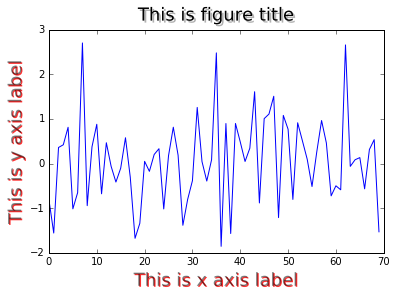

In [10]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np

data = np.random.randn(70)

fontsize = 18
plt.plot(data)
title = 'This is figure title'
x_label = 'This is x axis label'
y_label = 'This is y axis label'
s
title_text_obj = plt.title(
    title, fontsize=fontsize, verticalalignment='bottom')

title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])

# offset_xy -- set the 'angele' of the shadow
# shadow_rgbFace -- set the color of the shadow
# patch_alpha -- setup the transparency of shadow

offset_xy = (1, -1)
rgbFace = (1.0, 0.0, 0.0) # Red
alpha = 0.8

# customize shadow properties
pe = patheffects.withSimplePatchShadow(
    offset=offset_xy, shadow_rgbFace=rgbFace, alpha=alpha)

# apply them to the xaxis and yaxis labels
xlabel_obj = plt.xlabel(x_label, fontsize=fontsize, alpha=0.5)
xlabel_obj.set_path_effects([pe])

ylabel_obj = plt.ylabel(y_label, fontsize=fontsize, alpha=0.5)
ylabel_obj.set_path_effects([pe])

plt.show()

# matplotlib 组织图标 の 过程
## 最上层是一个 Figure 实例 包含所有可见的和其他不可见的内容 该 Figure 实例包含了一个 Axes 实例字段 Figure.axes  Axes 实例包含所有关心的所有东西：

We will create new figure
    1. 创建一个 基于一些随机数生成的数据的 plot
    2. 添加 title 和 axes 标签
    3. 添加 alpha 设置
    4. 向 title 和 axes 标签 来添加 阴影效果

#####  实例化 matplotlib.patheffects.withSimplePatchShadow object &nbsp; 并将之引用并保存在 pe 变量中 以供后面代码 来重用她

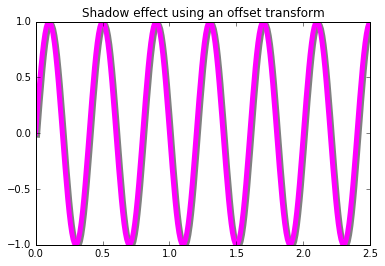

In [6]:
import matplotlib.transforms as transforms

def setup(layout=None):
	assert layout is not None
	fig = plt.figure()
	ax = fig.add_subplot(layout)
	return fig, ax

def get_signal():
	t = np.arange(0., 2.5, 0.01)
	s = np.sin(5 * np.pi * t)
	return t, s

def plot_signal(t, s):
	line, = axes.plot(t, s, linewidth=5, color='magenta')
	return line,

def make_shadow(fig, axes, line, t, s):
	delta = 2/72. # how many points to move the shadow
	offset = transforms.ScaledTranslation(delta, -delta, fig.dpi_scale_trans)
	offset_transform = axes.transData + offset

	# plot the same data, but now, using, offset, transform
	# zorder -- to render it below the line
	axes.plot(t, s, linewidth=5, color='gray', transform=offset_transform, zorder=0.5*line.get_zorder())

if __name__ == '__main__':
	fig, axes = setup(111)
	t, s = get_signal()
	line, = plot_signal(t, s)
	make_shadow(fig, axes, line, t, s)
	axes.set_title('Shadow effect using an offset transform')
	plt.show()

#####  通过 setup create figure and  axes, 然后 get a signal (生成一个正弦波数据) 在 plot_signal 绘制出 基本信号图 最后 进行 阴影坐标转换并在 make_shadow 绘制出 阴影 
##### 使用 偏移效果 创建一个 偏移对象 将阴影放置在 原始对象之下 并偏移几个 点的距离 即可实现
##### 原始对象是一个简单的正弦波 用 标准的 plot 进行绘制
matplotlib include a transformations helper -- matplotlib.transforms.ScaledTranslation 来添加 偏移转换

## 向图表添加数据表
### plt.table() create a 带单元格的表格， 并将它 添加到当前 坐标中 表格可以有 行标题与列标题 每个单元格包含文本 or 补片
    table(cellText=None, cellColours=None,
	cellLoc='right', colWidths=None,
	rowLabels=None, rowColours=None, rowLoc='left',
	colLabels=None, colColours=None, colLoc='center',
	loc='bottom', bbox=None)

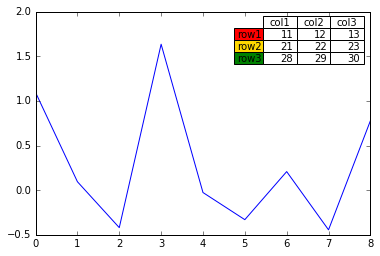

In [8]:
plt.figure()
ax = plt.gca()
y = np.random.randn(9)
col_labels = ['col1', 'col2', 'col3']
row_labels = ['row1', 'row2', 'row3']
table_vals = [[11, 12, 13], [21, 22, 23], [28, 29, 30]]
row_colors = ['red', 'gold', 'green']

my_tables = plt.table(cellText=table_vals,
					colWidths=[0.1] * 3,
					rowLabels=row_labels,
					colLabels=col_labels,
					rowColours=row_colors,
					loc='upper right')
plt.plot(y)
plt.show()

###### 函数 实例化 返回一个 matplotlib.table.Table 对象实例
###### 可将 该实例 添加到 axes 实例前 可有更多控制  可使用 Axes.add_table(table) method to 将 table 实例 添加到 axes 这里 table 是 matplotlib.table.Table 类的实例

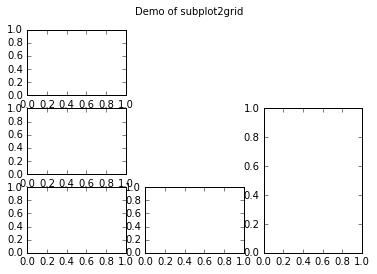

In [13]:
import matplotlib.pyplot as plt
plt.figure(0)

axes1 = plt.subplot2grid((3, 3), (0, 0), colspan=1)
axes2 = plt.subplot2grid((3, 3), (1, 0), colspan=1)
axes3 = plt.subplot2grid((3, 3), (1, 2), rowspan=3)
axes4 = plt.subplot2grid((3, 3), (2, 0))
axes5 = plt.subplot2grid((3, 3), (2, 1), colspan=1)

# tidy up tick labels size
all_axes = plt.gcf().axes
for ax in all_axes:
	for ticklabel in ax.get_xticklabels() + ax.get_yticklabels():
		ticklabel.set_fontsize(10)

plt.suptitle('Demo of subplot2grid')
plt.show()

##### 定制化 current axes or subplot
axes = fig.add_subplot(111)<br>
rectangle = axes.patch<br>
rectangle.set_facecolor('blue')<br>

##### 每个 axes  instance 包含一个 引用 rectangle instance patch attr -- 表示 current axes  背景 可更新 attr 进而更新 current axes 背景

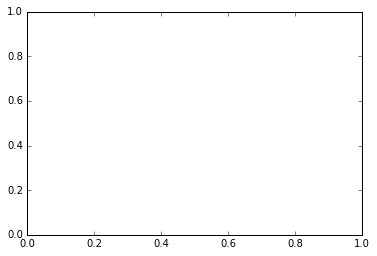

In [14]:
fig = plt.figure()
axes = fig.add_subplot(111)
rect = matplotlib.patches.Rectangle((1, 1), width=6, height=12)
axes.add_patch(rect)
# manually force a fig draw
axes.figure.canvas.draw()

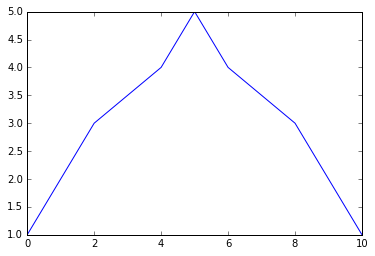

In [15]:
plt.plot([1,2,3,3.5,4,5,4,3.5,3,2,1])

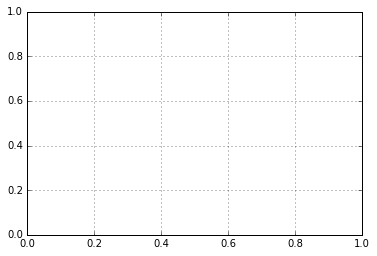

In [16]:
plt.grid()

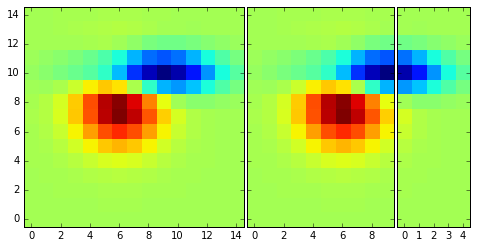

In [19]:
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.cbook import get_sample_data

def get_demo_image():
	f = get_sample_data('axes_grid/bivariate_normal.npy', asfileobj=False)
	# z is a numpy array of 15X15
	Z = np.load(f)
	return Z, (-3, 4, -4, 3)

def get_grid(fig=None, layout=None, nrows_ncols=None):
	assert fig is not None
	assert layout is not None
	assert nrows_ncols is not None

	grid = ImageGrid(fig, layout, nrows_ncols=nrows_ncols, axes_pad=0.05, add_all=True, label_mode='L')
	return grid

def load_images_to_grid(grid, Z, *images):
	min, max = Z.min(), Z.max()
	for i, image in enumerate(images):
		axes = grid[i]
		axes.imshow(image, origin='lower', vmin=min, vmax=max, interpolation='nearest')

if __name__ == '__main__':
	fig = plt.figure(1, (8, 5))
	grid = get_grid(fig, 111, (1, 3))
	Z, extent = get_demo_image()

	# slice iamge
	image1 = Z
	image2 = Z[:, :10]
	image3 = Z[:, 10:]

	load_images_to_grid(grid, Z, image1, image2, image3)

	plt.draw()
	plt.show()

### 创建等高线
    1. 实现一个方法来模拟信号处理器
    2. 生成一些线性信号数据
    3. 将数据转换到合适的矩阵中供矩阵操作使用
    4. 绘制等高线
    5. 添加等高线标签
    6. 显示图形

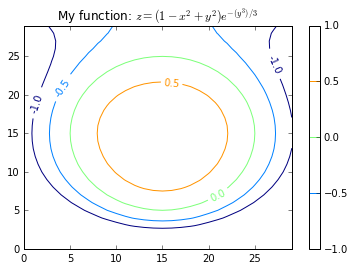

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def process_signals(x, y):
	return (1 - (x ** 2 + y **2)) * np.exp(-y ** 3 / 3)

x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.5, 1.5, 0.1)

# Make grids of points

X, Y = np.meshgrid(x, y)

Z = process_signals(X, Y)

# Number of isolines

N = np.arange(-1, 1.5, 0.5)

# adding the Contour lines with labels
CS = plt.contour(Z, N, linewidth=2, cmap=mpl.cm.jet)
plt.clabel(CS, inline=True, fmt='%1.1f', fontsize=10)
plt.colorbar(CS)

plt.title('My function: $z=(1-x^2+y^2) e^{-(y^3)/3}$')
plt.show()

##### 工作原理
    process_signals 获得 Z 与等值线水平数量
    简单 call contour
    可尝试修改 N = np.arange(-1, 1.5, 0.3) 来体验对相同数据 进行 不同编码时 在等高线中呈现的差异
    以上 N[2] 越大 每个等高线之间间隔越大

### 为图表填充底层区域
为特定的图形填充阴影

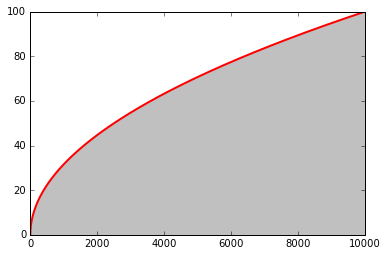

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

t = range(10000)
y = [sqrt(i) for i in t]
plt.plot(t, y, color='red', lw=2)
plt.fill_between(t, y, color='silver')
plt.show()

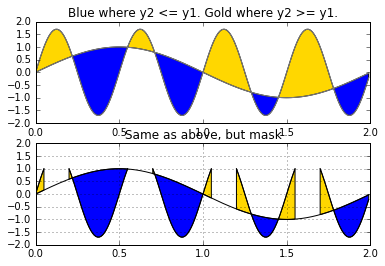

In [11]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(np.pi * x)
y2 = 1.7 * np.sin(4 * np.pi * x)

fig = plt.figure()
axes1 = fig.add_subplot(211)
axes1.plot(x, y1, x, y2, color='grey')
axes1.fill_between(x, y1, y2, where=y2 <= y1, facecolor='blue', interpolate=True)
axes1.fill_between(x, y1, y2, where=y2 >=y1, facecolor='gold', interpolate=True)
axes1.set_title('Blue where y2 <= y1. Gold where y2 >= y1.')
axes1.set_ylim(-2, 2)

# Mask values in y2 with value greater than 1.0
y2 = np.ma.masked_greater(y2, 1.0)
axes2 = fig.add_subplot(212, sharex=axes1)
axes2.plot(x, y1, x, y2, color='black')
axes2.fill_between(x, y1, y2, where=y2 <= y1, facecolor='blue', interpolate=True)
axes2.fill_between(x, y1, y2, where=y2 >= y1, facecolor='gold', interpolate=True)
axes2.set_title('Same as above, but mask')
axes2.set_ylim(-2, 2)
axes2.grid('on')

plt.show()

### 绘制极线图
极坐标

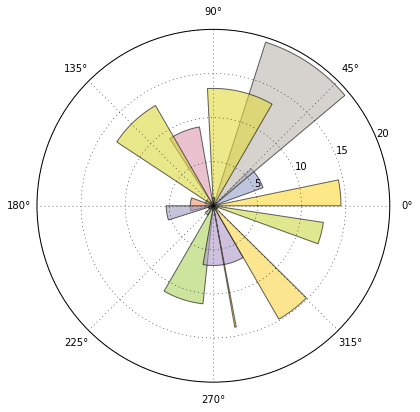

In [13]:
import matplotlib.cm as cm

figsize = 7
colormap = lambda r: cm.Set2(r/20.)
N = 18

fig = plt.figure(figsize=(figsize, figsize))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7], polar=True)

theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = 20 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for r, bar in zip(radii, bars):
	bar.set_facecolor(colormap(r))
	bar.set_alpha(0.6)

plt.show()

In [24]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def build_folders(start_path):
	folders = []

	for each in get_directories(start_path):
		size = get_size(each)
		if size >= 25 * 1024 * 1024:
			folders.append({'size': size, 'path': each})

	for each in folders:
		print('Path: ' + os.path.basename(each['path']))
		print('Size: ' + str(each['size'] / 1024 / 1024) + ' MB')

	return folders

def get_size(path):
	assert path is not None

	total_size = 0
	# 应该使用 os.path.walk [not os.walk]
	for dirpath, dirnames, filenames in os.walk(path):
		for f in filenames:
			fp = os.path.join(dirpath, f)
			try:
				size = os.path.getsize(fp)
				total_size += size
				# print('Size of \'{0}\' is {1}'.format(fp, size))
			except OSError as err:
				print(str(err))
				pass

	return total_size

def get_directories(path):
	dirs = set()
	for dirpath, dirnames, filenames in os.walk(path):
		dirs = set([os.path.join(dirpath, x) for x in dirnames])
		break  # just want the first one
	return dirs

def draw(folders):
	"""Draw folder size for given folder"""
	figsize = (8, 8)  # keep the figsize square
	ldo, rup = 0.1, 0.8  # leftwon and rightup normalized
	fig = plt.figure(figsize=figsize)
	ax = fig.add_axes([ldo, ldo, rup, rup], polar=True)

	# transfrom data
	x = [os.path.basename(x['path']) for x in folders]
	y = [y['size'] / 1024 / 1024 for y in folders]
	theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / len(x))
	radii = y

	bars = ax.bar(theta, radii)
	middle = 90 / len(x)
	theta_ticks = [t * (180 / np.pi) + middle for t in theta]
	lines, labels = plt.thetagrids(theta, labels=x, frac=0.5)
	for step, each in enumerate(labels):
		each.set_rotation(theta[step] * (180 / np.pi) + middle)
		each.set_fontsize(8)

	# configure bars
	colormap = lambda r: cm.Set2(r / len(x))
	for r, each in zip(radii, bars):
		each.set_facecolor(colormap(r))
		each.set_alpha(0.5)

	plt.show()

Path: wechat
Size: 72.20945930480957 MB
Path: quartus
Size: 582.2384538650513 MB
Path: MSC51
Size: 1045.412685394287 MB
Path: Labview
Size: 259.65009212493896 MB
Path: MATLAB
Size: 94.7416000366211 MB
Path: Internship
Size: 247.95698261260986 MB
Path: National Instruments
Size: 62.23007583618164 MB
Path: SQL
Size: 240.13556289672852 MB


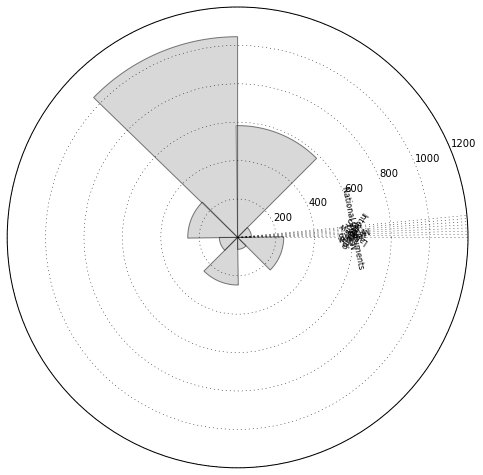

In [27]:
folders = build_folders('F:\\Save')
draw(folders)